### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time']=pd.to_datetime(df['Date/Time'])





In [3]:
# Group by date and count the number of pickups
pickups_by_date = df.groupby(df['Date/Time'].dt.date).size()
print(pickups_by_date)

# Find the date with the highest number of pickups
result=pickups_by_date.idxmax()
print(result)
print("Date with the most number of uber pickups:",result)
print("value: ",pickups_by_date.max())

Date/Time
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
2014-08-06    30495
2014-08-07    32759
2014-08-08    30411
2014-08-09    26286
2014-08-10    20584
2014-08-11    22632
2014-08-12    29646
2014-08-13    29788
2014-08-14    30457
2014-08-15    28974
2014-08-16    26234
2014-08-17    21209
2014-08-18    21956
2014-08-19    24834
2014-08-20    27955
2014-08-21    32304
2014-08-22    29512
2014-08-23    27097
2014-08-24    22036
2014-08-25    22093
2014-08-26    24550
2014-08-27    27018
2014-08-28    28597
2014-08-29    27424
2014-08-30    23930
2014-08-31    23271
dtype: int64
2014-08-07
Date with the most number of uber pickups: 2014-08-07
value:  32759


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [4]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
result=pickups_by_date.idxmax()
print("Date with most number of Uber pickups:",result)

# Get the count of pickups on the highest date
date_with_highest_pickups = pickups_by_date.max()
print("Number of uber pickups on the date with the highest number of pickups:",date_with_highest_pickups)


Date with most number of Uber pickups: 2014-08-07
Number of uber pickups on the date with the highest number of pickups: 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [5]:
# Count the number of unique TLC base companies
print("number of unique TLC based companies:", df['Base'].nunique())



number of unique TLC based companies: 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [6]:
# Group by TLC base company and count the number of pickups
pickeups_by_company= df.groupby('Base').size()
print(pickeups_by_company.max())

# Find the TLC base company with the highest number of pickups
print("TLC base company with the highest number of pickups:",pickeups_by_company.idxmax())
#another way to fine size of company
df['Base'].value_counts().idxmax()

355803
TLC base company with the highest number of pickups: B02617


'B02617'

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [7]:
# Group by TLC base company and count the number of pickups
#df['Base'].value_counts()
df.groupby('Base').size()


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [8]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickeups_by_hour = df.groupby(df['Hour']).size()

# Find the hour with the highest number of pickups
result = pickeups_by_hour.idxmax()
print('Busiest time of the day is :',result)



Busiest time of the day is : 17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0, 0.5, 'Number of uber pickups')

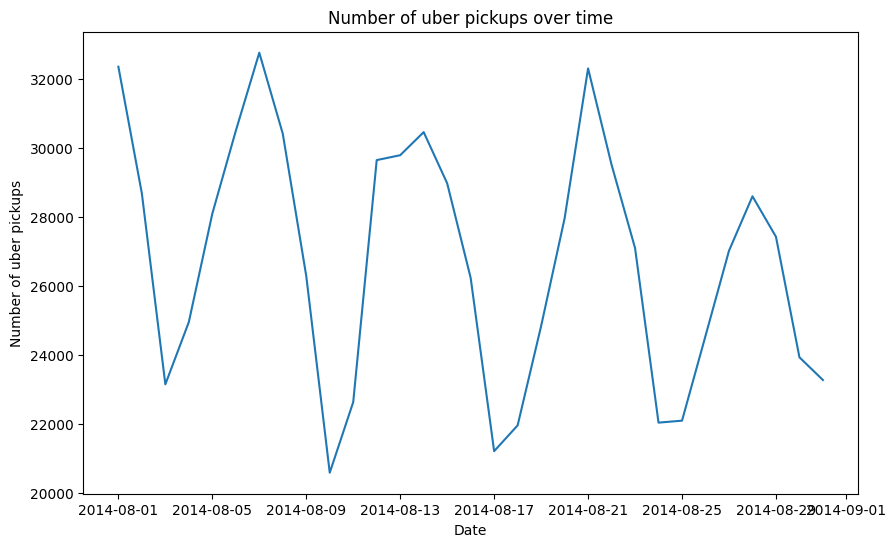

In [9]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups 
pickeups_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
pickeups_by_date.plot(kind='line',figsize=(10,6))
plt.title("Number of uber pickups over time")
plt.xlabel("Date")
plt.ylabel("Number of uber pickups")

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

Text(0, 0.5, 'Lat')

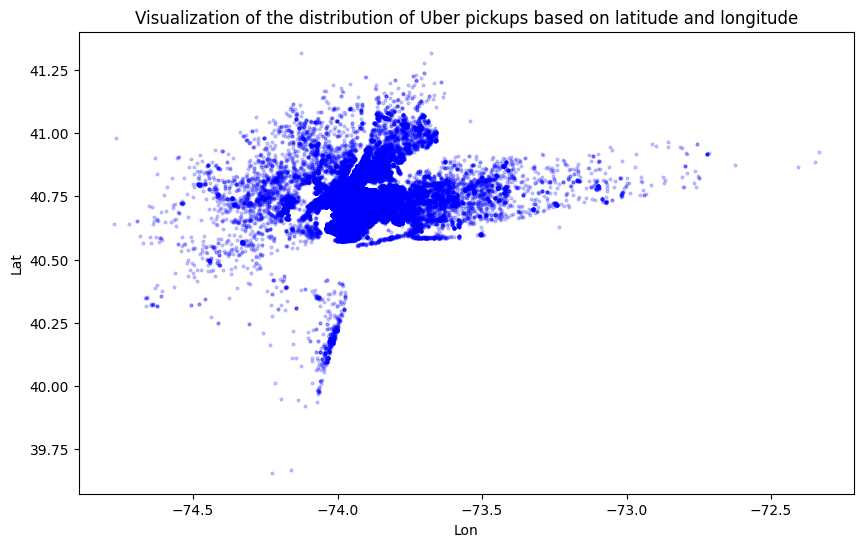

In [16]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(10,6))
plt.scatter(df["Lon"], df["Lat"], s=4, alpha=0.2, color="blue")
plt.title('Visualization of the distribution of Uber pickups based on latitude and longitude')
plt.xlabel('Lon')
plt.ylabel('Lat')

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0, 0.5, 'Number of pickups')

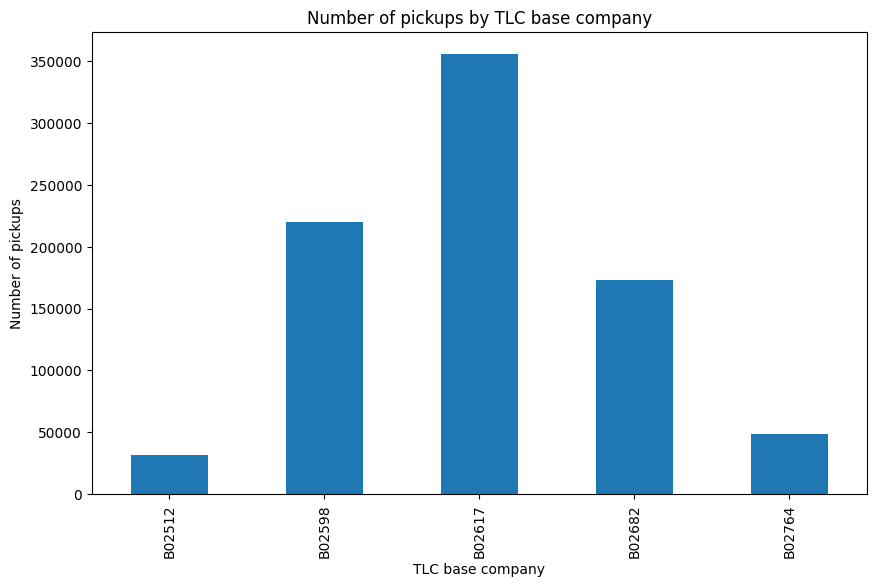

In [19]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
pickup_count_by_company = df.groupby('Base').size()
plt.figure(figsize=(10,6))
pickup_count_by_company.plot(kind="bar")
plt.title("Number of pickups by TLC base company")
plt.xlabel("TLC base company")
plt.ylabel("Number of pickups")

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Date/Time
Friday       148674
Saturday     132225
Thursday     124117
Wednesday    115256
Sunday       110246
Tuesday      107124
Monday        91633
Name: count, dtype: int64


Text(0, 0.5, '')

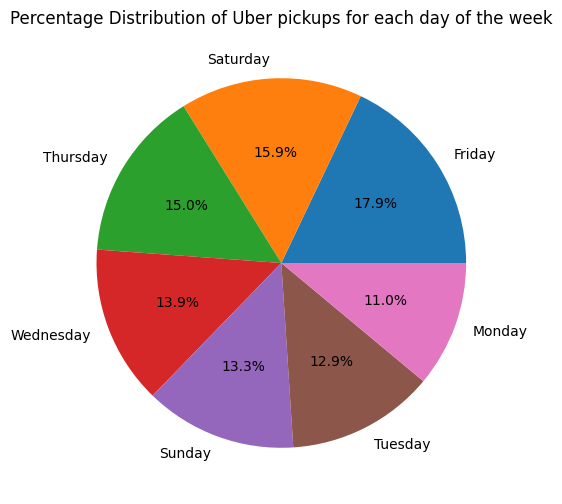

In [21]:
# Group by day of the week and count the number of pickups
pickups_by_day = df["Date/Time"].dt.day_name().value_counts()
print(pickups_by_day)

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(10,6))
pickups_by_day.plot(kind="pie", autopct="%1.1f%%")
plt.title("Percentage Distribution of Uber pickups for each day of the week")
plt.ylabel("")